# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.ensemble import BalancedRandomForestClassifier

# Explore and pre-process the dataset

In [ ]:
df = pd.read_csv('BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.drop(['CLIENTNUM'], axis=1, inplace=True)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
y = df['Attrition_Flag']
df = df.drop('Attrition_Flag', axis=1)

In [ ]:
y.value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


From y.value_counts(), you can see that this data is imbalanced with Imbalance Ratio = 8500/1627 = 5.22

In [ ]:
categorical_columns = df.select_dtypes("object").columns
print(categorical_columns)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,True,False,False,False,True,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,False,False,False,False,True,False,True,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,True,False,False,True,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,False,False,False,False,True,False,True,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
x = df

# Use cross-validation, and build a model to predict churn rate.

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from math import log2, ceil
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

tree_depth = ceil(log2(len(df.columns)))
model = BalancedRandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=2, sampling_strategy='auto', replacement=True, bootstrap=True)
model.fit(x, y)
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])

cv = KFold(n_splits=10)
n_scores = cross_val_score(pipeline, x, y, cv=cv, n_jobs=-1, error_score='raise')

pipeline.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('m',
                 BalancedRandomForestClassifier(bootstrap=True,
                                                criterion='entropy',
                                                n_estimators=200,
                                                replacement=True,
                                                sampling_strategy='auto'))])

In [ ]:
y_pred = cross_val_predict(pipeline, x, y, cv=cv)
print(y_pred)

In [ ]:
n_scores.mean()

0.876072422148434

# Once the model is built,

## Show the confusion-matrix

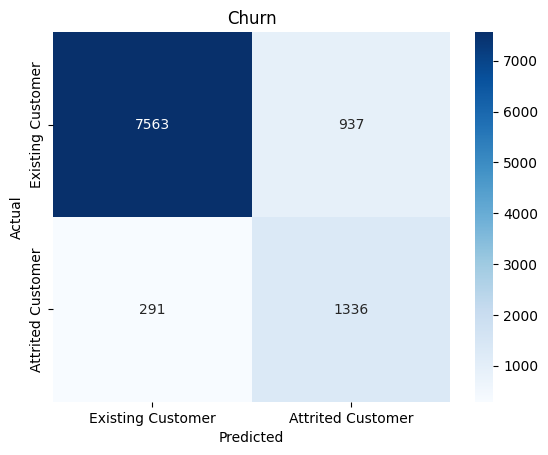

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y, y_pred, labels=['Existing Customer', 'Attrited Customer'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])
plt.title('Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Analyze precision, recall and f1-score of the two classes.

In [ ]:
report = classification_report(y, y_pred, target_names=['Attrited Customer', 'Existing Customer'])
print(report)

                   precision    recall  f1-score   support

Attrited Customer       0.53      0.82      0.65      1627
Existing Customer       0.96      0.86      0.91      8500

         accuracy                           0.86     10127
        macro avg       0.75      0.84      0.78     10127
     weighted avg       0.89      0.86      0.87     10127

